<a href="https://colab.research.google.com/github/jrakhshanda/Machine-Learning-Projects/blob/master/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection - Credit Card Fraud Detection Using Decision Trees and Näive Bayes Classifiers

The datasets contains transactions made by credit cards in September 2013
by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



















In [127]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import tables
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Importing Data and Quality Check**

In [128]:
data = pd.read_csv("creditcard.csv")
data.dropna(inplace = True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f34329128>,
      dtype=object)

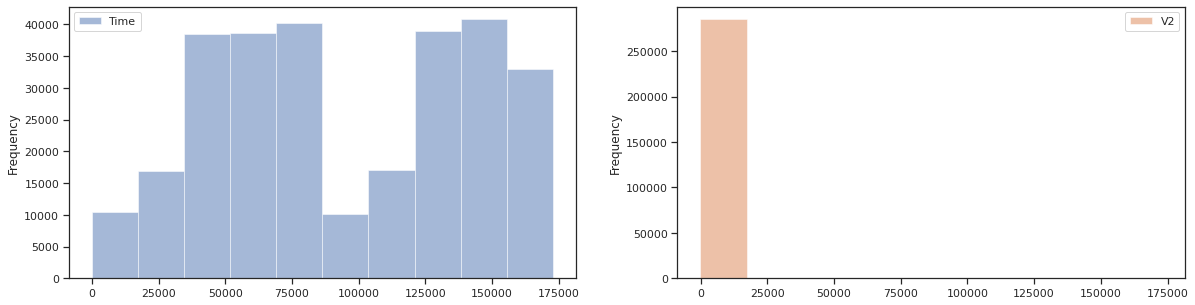

In [129]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
data.iloc[:,[0,2]].plot(kind='hist', subplots=True, ax=axes, alpha=0.5)

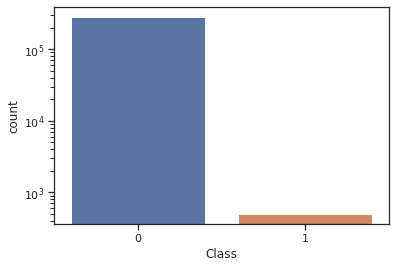

In [130]:
sns.set(style="ticks")
ax=sns.countplot(x='Class',data=data);
ax.set_yscale('log')

**Correlation Matrix Of Features**

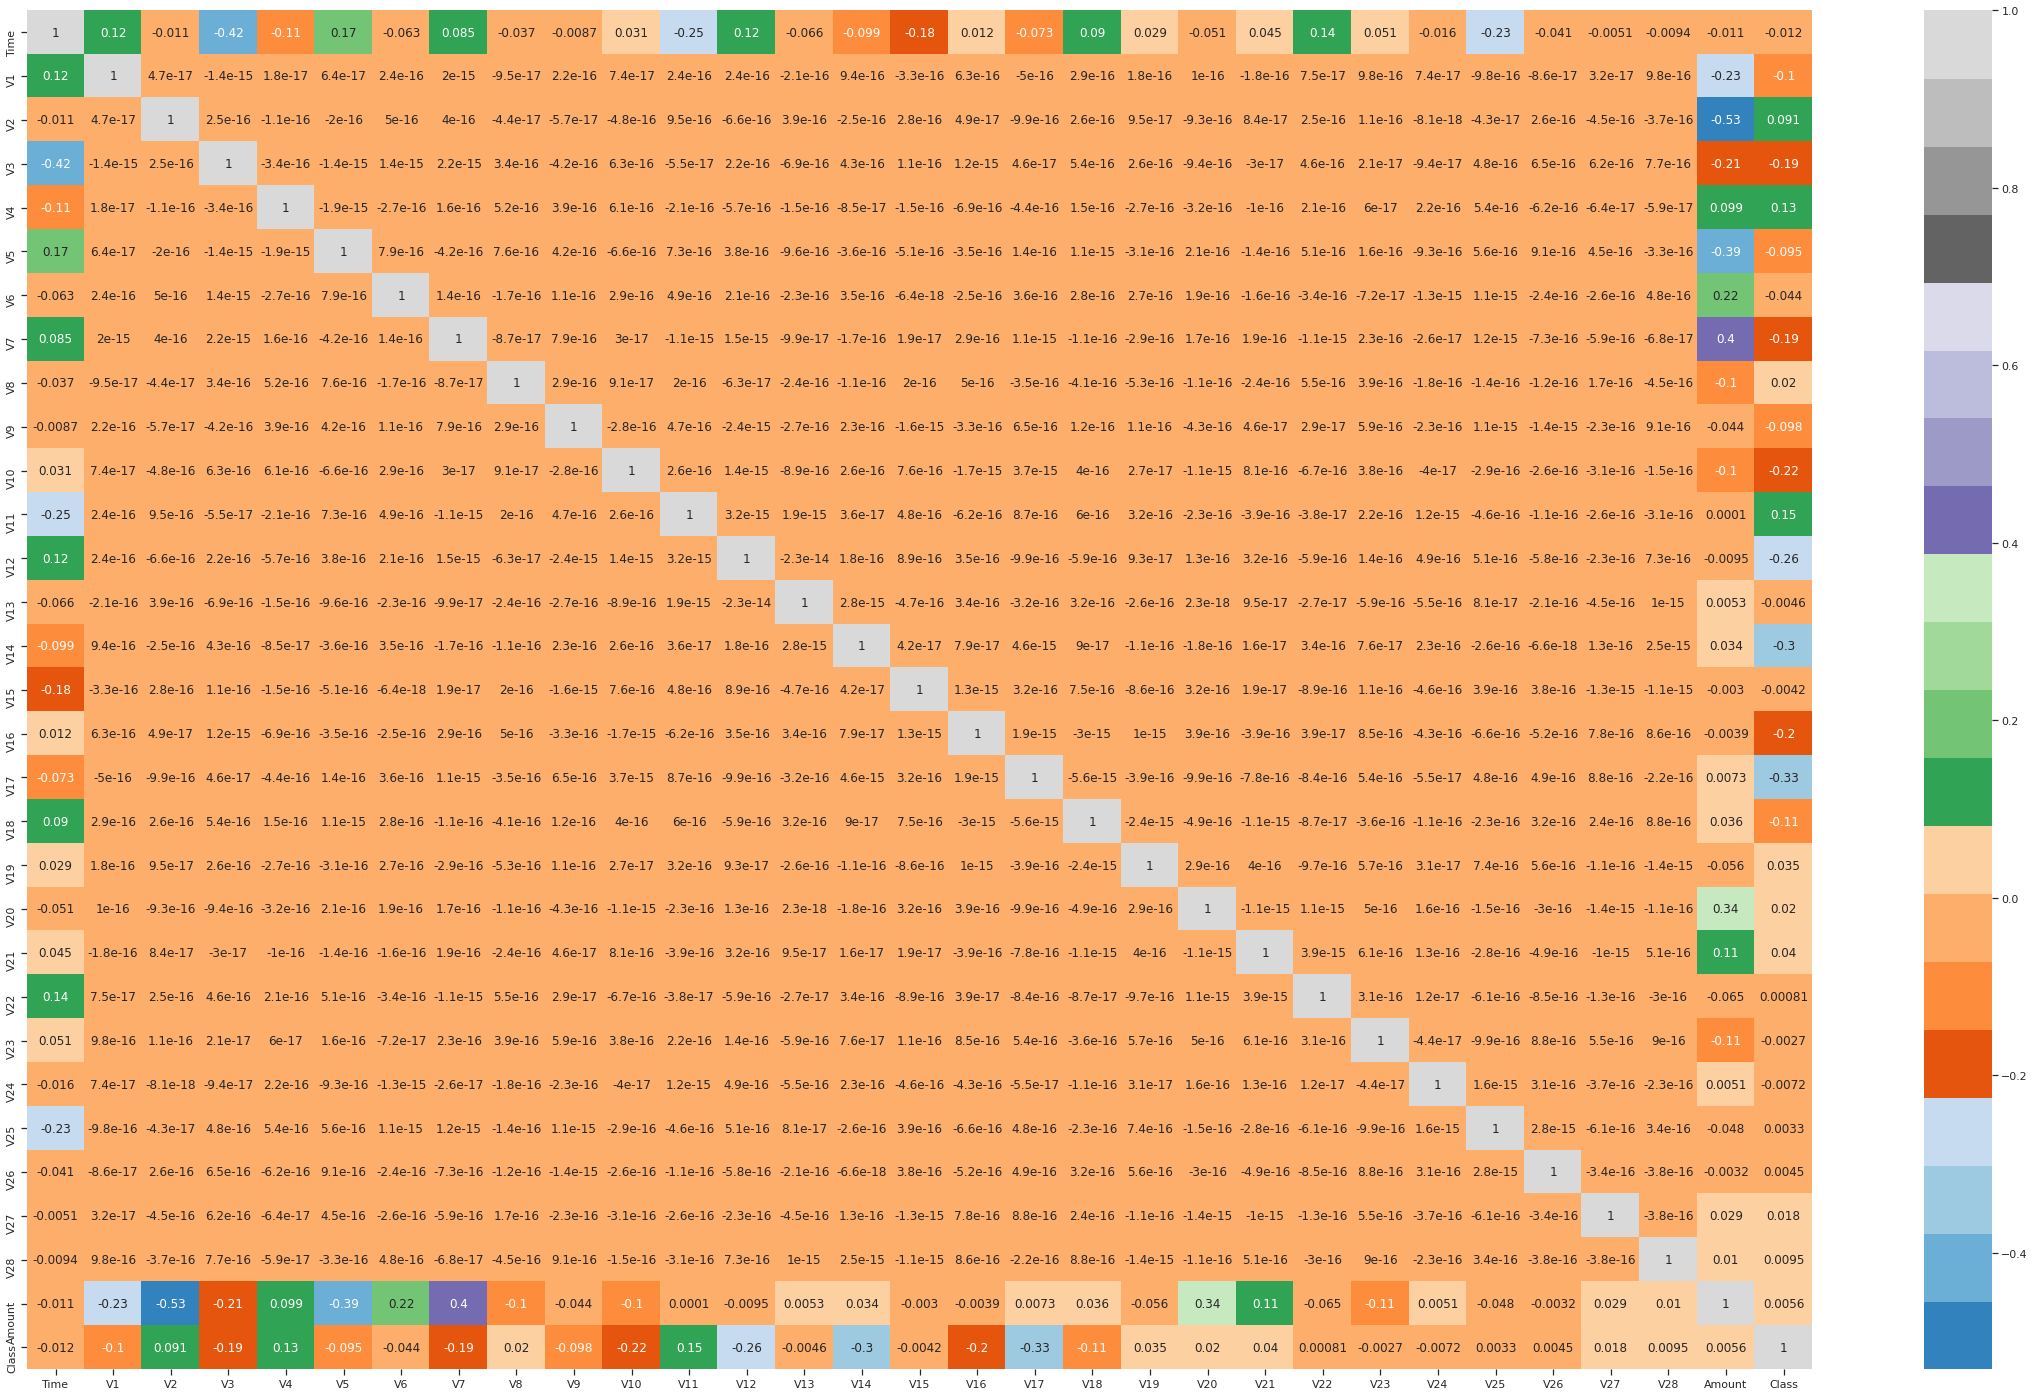

In [131]:
plt.figure(figsize = (40,25))
sns.heatmap(data.corr(), annot = True, cmap="tab20c")
plt.show()

The heatmap clearly shows which of the features aremulticollinear in nature. The plot also represents which of the features have high collinearity(positive or negative) with the target variable 'Class'. We can use this information to further reduce the dimensionality of our data. This will help us to reduce the complexity of learned model.

**Selecting Dependent and Independent Features**

In [132]:
y = data['Class'].astype('int')
X = data[data.columns[0:30]].astype('float')

**Splitting Data into Train and Test** 

We have divided data into two parts such that the traini data consists of 70% of the original data and testing part consists of the 30% of the data.
We are passing 3 parameters features, target, and test_set size in the function train_test_split().

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

## Decision Tree Model

In this section we are creating a decision tree model using skikit-lear. We are classifying our data based on gini index impurities. we trained the model using gini index splitting method.

In [134]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = dtc.fit(X_train, y_train)

model.get_depth()

20

In [135]:
#Predict the response for train dataset
y_predTrain = dtc.predict(X_train)

**Confusion Matrix of Training dataset**

We are checking the performance of our model on training dataset by the means of misclassification rates of the data.

In [136]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix as cm
conf_matTrain = cm(y_train, y_predTrain)
print(conf_matTrain)

[[199007      0]
 [     0    357]]


In [137]:
print(metrics.classification_report(y_train,y_predTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199007
           1       1.00      1.00      1.00       357

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



We can see from the above results that precision of our model on training data is 1 this means that we have zero missclassification errors on training data. Now we will check our trained model on testing data.

**Model Evaluation**

Let's estimate, how accurately the classifier or model can predict the type of cultivars.



In [138]:
from sklearn.metrics import confusion_matrix
y_pred = dtc.predict(X_test)

len(y_pred[y_pred==0])

85304

**Confusion Matrix of Test Data**

In [139]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[85267    41]
 [   37    98]]


In [140]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.71      0.73      0.72       135

    accuracy                           1.00     85443
   macro avg       0.85      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [141]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9990871107053826


**Visualizing Decision Trees**

We are Scikit-learn's export_graphviz function for display the tree. For plotting tree.

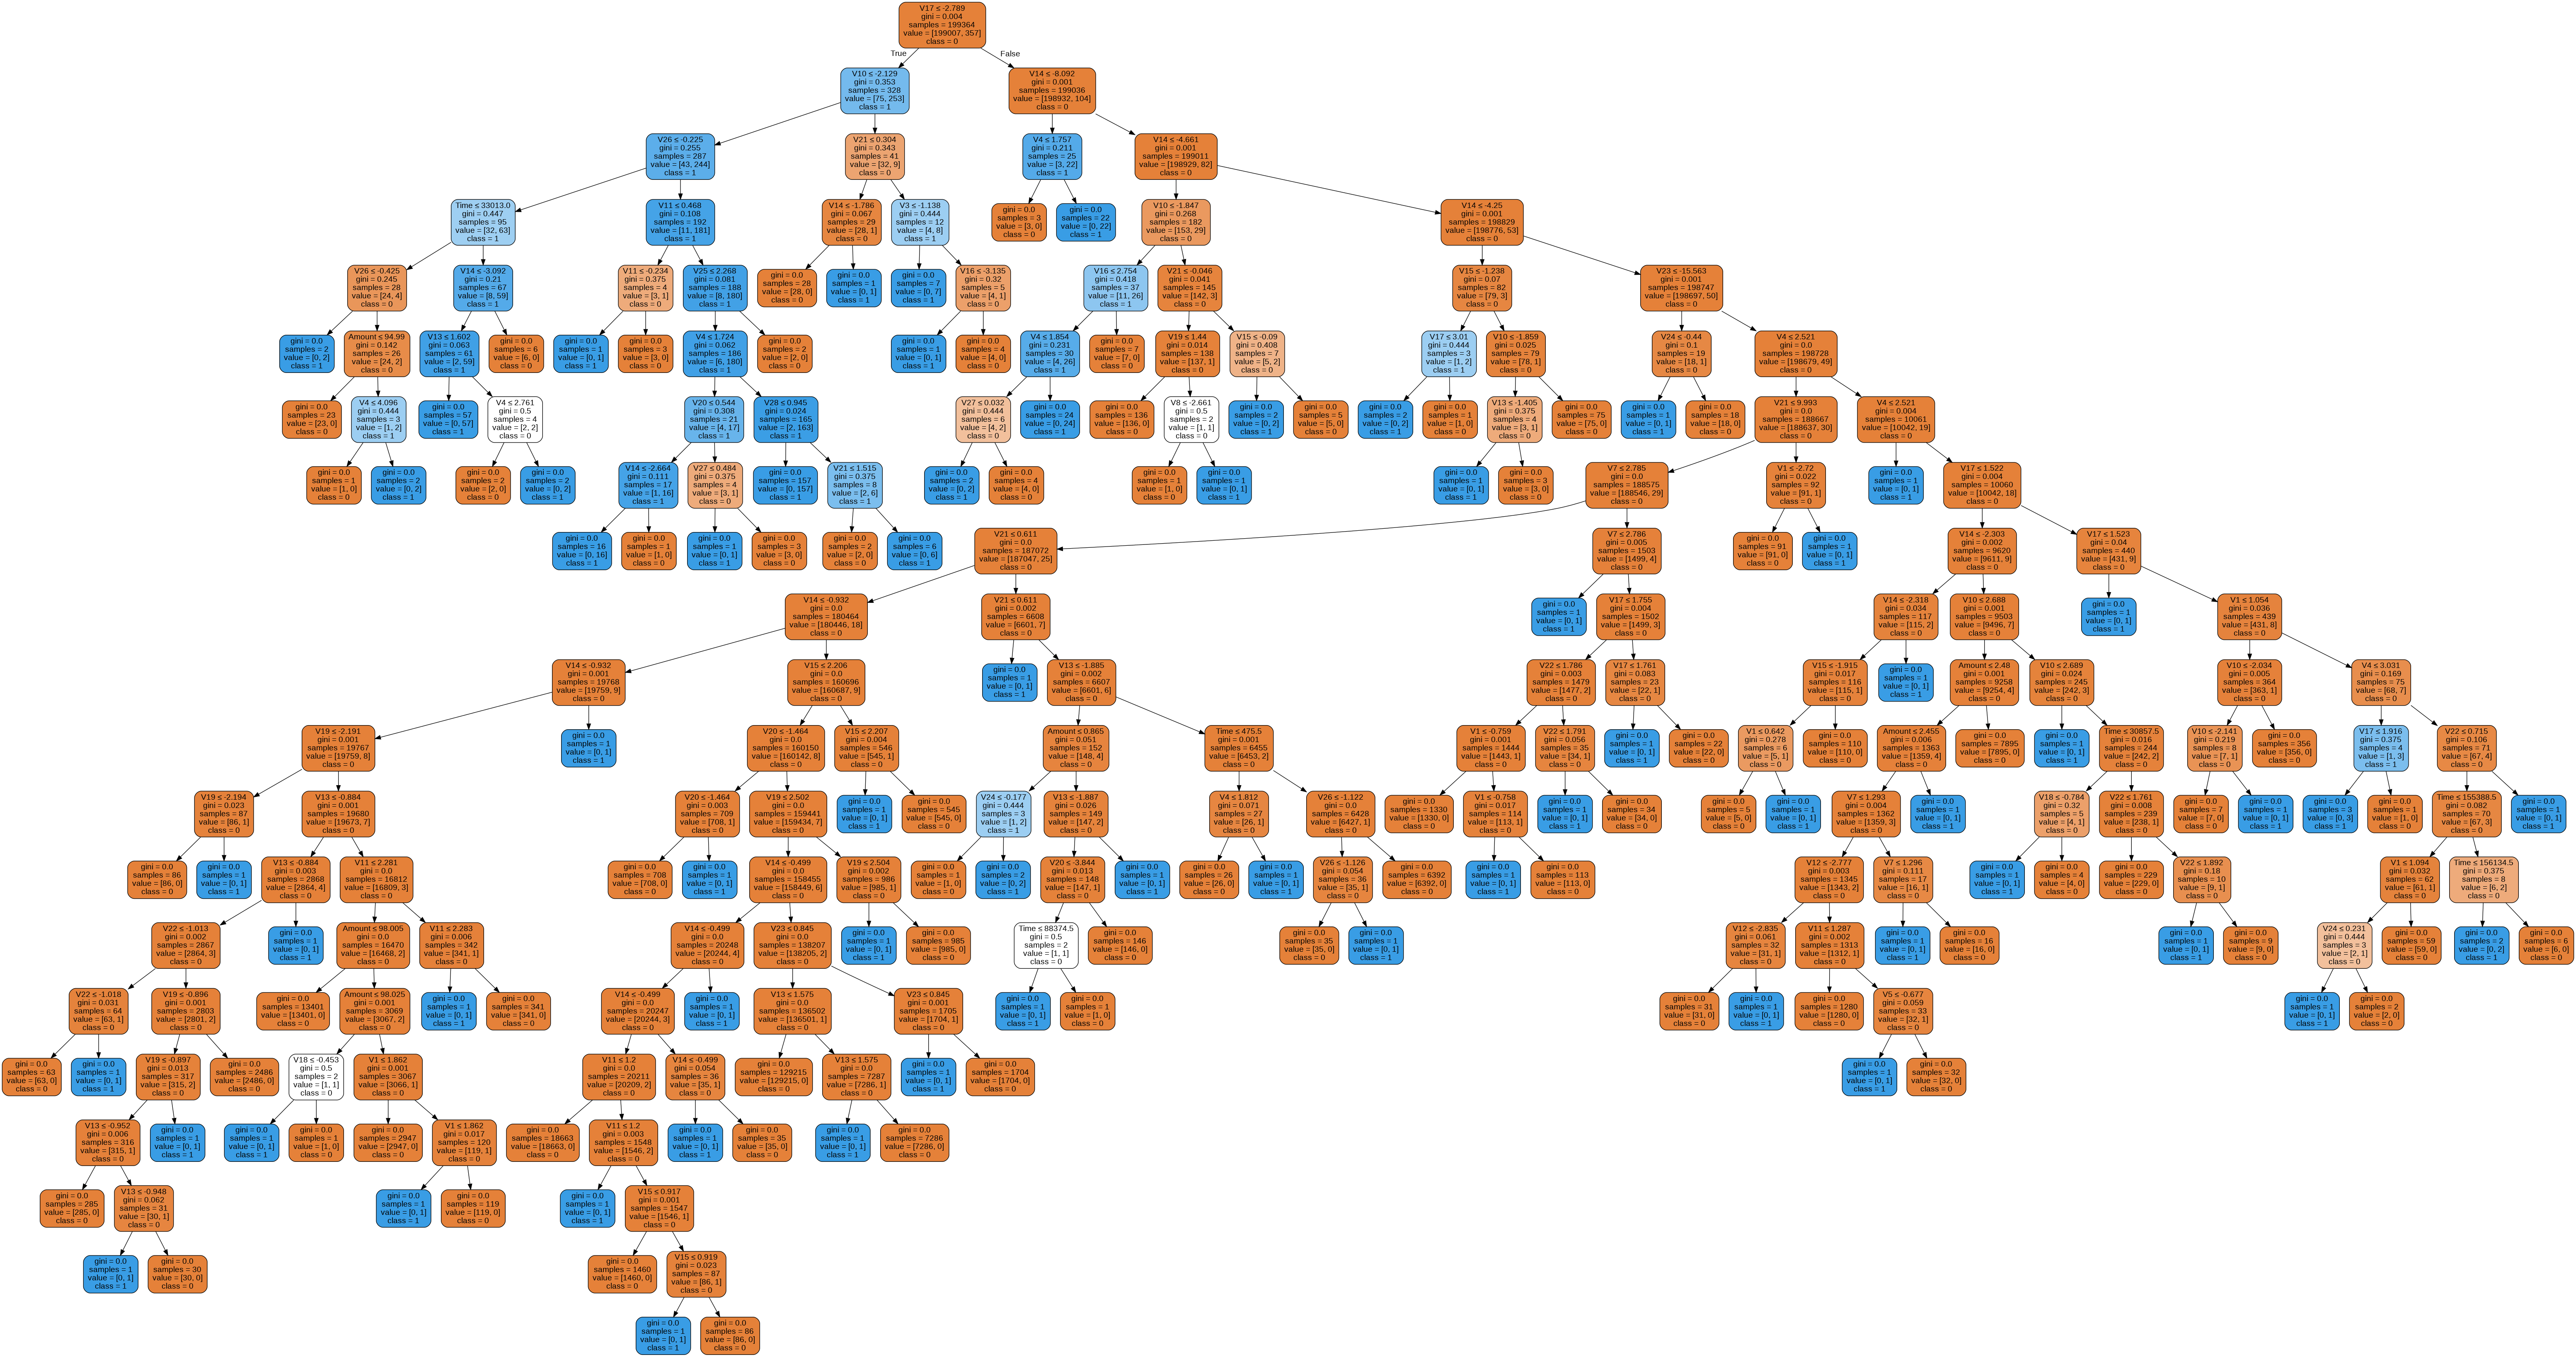

In [142]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = data.columns[0:30]
dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fraud.png')
Image(graph.create_png())

### Optimization of Decision Tree Performance

In Scikit-learn, optimization of decision tree classifier is performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In our case we can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, we can also try other attribute selection measure such as entropy rather than using gini index.

In [143]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dtc_pruned = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc_pruned.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9992860737567735


**Visualize the optimized Decision Tree**

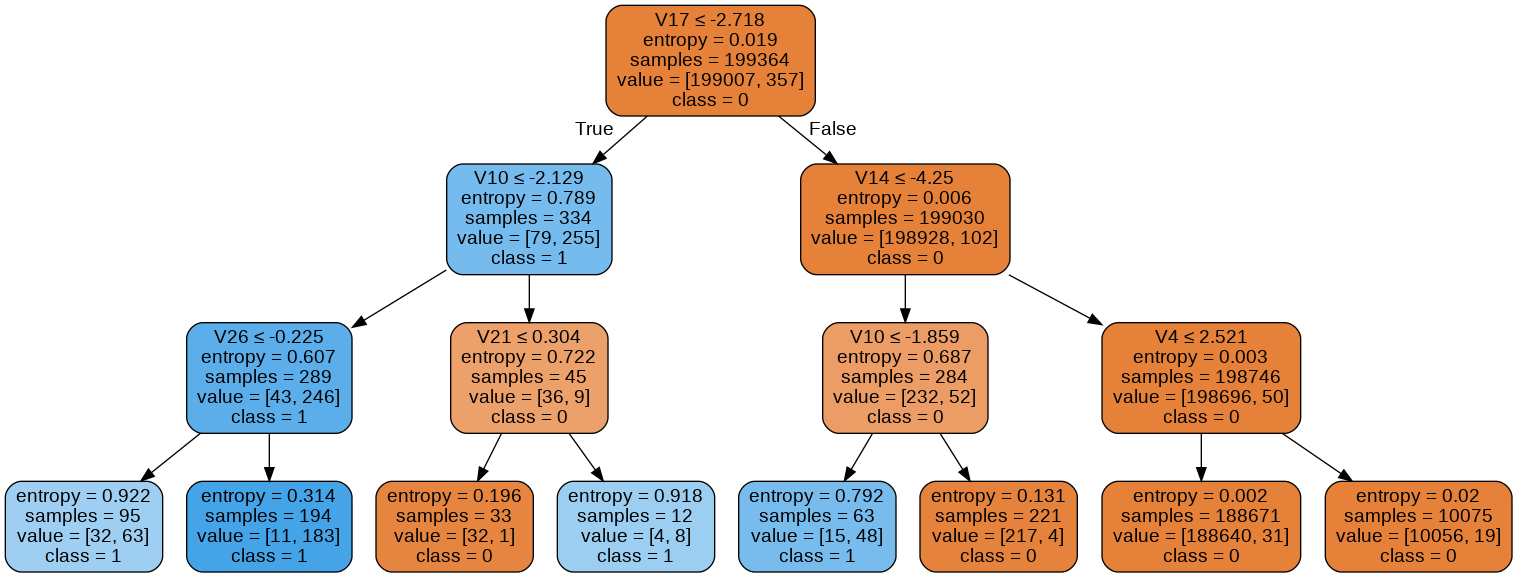

In [144]:
dot_data = StringIO()
export_graphviz(dtc_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

We can see from the above shown tree that pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot. Thus in order to reduce the model complexity we can assign maimum tree depth while training our model.

## Classification Using Näive Bayes Classifier

Here we are using training data to perform classification using Naïve Bayes models. This classifier uses Bayes theorem of probability for prediction of unknown class. Näive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features.  This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.

In [145]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
model = gnb.fit(X_train,y_train)

#Predict Output
y_pred1 = model.predict(X_test) 

**Confusion Matrix of Naive Bayes Classifier**

In [146]:
conf_mat = confusion_matrix(y_test, y_pred1)
print(conf_mat)

[[84787   521]
 [   49    86]]


Wecan see that misclassification rate of Näive bayes classiifer is greater than misclassification rate of decision trees.

In [147]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85308
           1       0.14      0.64      0.23       135

    accuracy                           0.99     85443
   macro avg       0.57      0.82      0.61     85443
weighted avg       1.00      0.99      1.00     85443



In [148]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9933288859239493


**ROC Curve**

ROC curves is a plot of true positive values vs false positive values. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds. As in our case true positive means the number of fraud transactions which are truly predicted. 

Area Under The Curve (AUC) The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset.


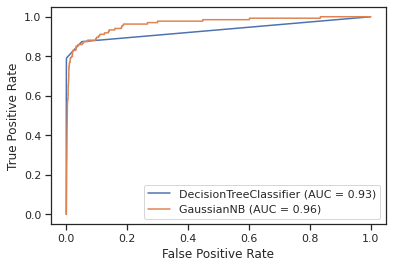

In [149]:
from sklearn.metrics import plot_roc_curve

classifiers = [dtc, gnb]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

##  Conclusion & Comparison

We are comparing the above result of Naïve Bayes with the optimal tree. We have analyzed that the accuracy of both models have almost the same on test data, but the TPR rate of Naïve Bayes is more than the optimal decision tree. Moreover area under the ROC curve of guasian naive bayes classifier is greater than the decision tree classifier. From this, we can conclude that Naïve Bayes is working better than the decision Tree model because the risk of predicting fraud transactions wrong is less as compared to the optimal decision tree model.
